# BASIC DATA ANALITICS WITH PURE PYTHON

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = 'usagov_bitly_data2012-03-16-1331923249.txt'
#open(path).readline()
#print(path)

In [2]:
import json
records = [json.loads(line) for line in open(path)]

In [3]:
print(len(records))

3560


In [12]:
records[0]['tz']

'America/New_York'

In [13]:
#extract the time zones
time_zones = [rec['tz'] for rec in records] 

KeyError: 'tz'

In [15]:
# not all records ha a time zone 'tz' element :(
# this can be easily handled by an IF addendum

In [8]:
#extract the time zones
time_zones = [rec['tz'] for rec in records if 'tz' in rec] 

In [9]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [6]:
# Unfortuntely next problem => there are empty values ... 
# it is also possible to exclude them, but leave them now!

In [21]:
# Lest count the number of the dierent time zones by pure python, to see what is 
# pandas gives us

In [7]:
# a short function to count down the time zones
def get_counts(sequence):
    counts={}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts
                

In [8]:
# a more python-like shorter version

#from collection import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int) #values will initialize with 0
    for x in sequence:
        counts[x] += 1
    return counts


In [9]:
# Now use our function on time_zones, to get a new object with numbers of timezones
counts = get_counts(time_zones)

In [13]:
# Let's see how many New Yorkers are there 
counts['America/New_York']

1251

In [14]:
# The length of the new data object
len(counts)

97

In [17]:
# the top10 time zones with a bit of dict acrobatics:
# first we need a simple key+value array from the dict (the first elemnt will be the count!)
# then we sort this array (ascending by count ...)
# then we send back the last "n" element of the array
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [16]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [6]:
from collections import Counter

In [10]:
counts2 = Counter(time_zones)

In [12]:
counts2.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

# COUNTING TIMES ZONES WITH PANDAS

In [13]:
# Do the neccessary imports
import pandas as pd

In [4]:
from pandas import DataFrame, Series

In [6]:
# Coinvert dictionary to pandas DataFrame
frame01 = DataFrame(records)

In [7]:
# Let's see what is in the dataframe:
frame01.head(5)

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [8]:
frame01['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [9]:
#Count tz values with pandas, using methode "value_counts"
tz_counts = frame01['tz'].value_counts()

In [10]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [14]:
#For plitting this, we need to fill in thze missing or empty data eleemnts ...
#For this filling, we use methode: "fillna"
clean_tz = frame01['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'UNKNONWN'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
UNKNONWN                521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

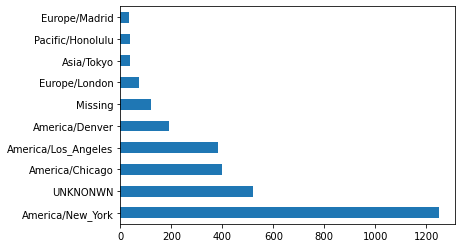

In [15]:
# Now, let's see how to plot:
tz_counts[:10].plot(kind='barh', rot=0)

In [17]:
# Now lets see seom string wizardry
frame01['a'][1]
frame01['a'][50]
frame01['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [19]:
results = Series([x.split()[0] for x in frame01.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [20]:
# Let's see a bit more element of the result set
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

In [33]:
# Now, lets see the WIN, and non-Win users based on agent string. 
# For this we have to exclude the misssing agent stringed data records
cframe = frame01[frame01.a.notnull()]
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

In [29]:
by_tz_os = cframe.groupby(['tz',operating_system])
#This can be reshaped into a table by "unstack()"
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0
